# Sheet 3

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.linear_model import LogisticRegression

## 2 Projection Trick

(a)

Text(0, 0.5, 'y')

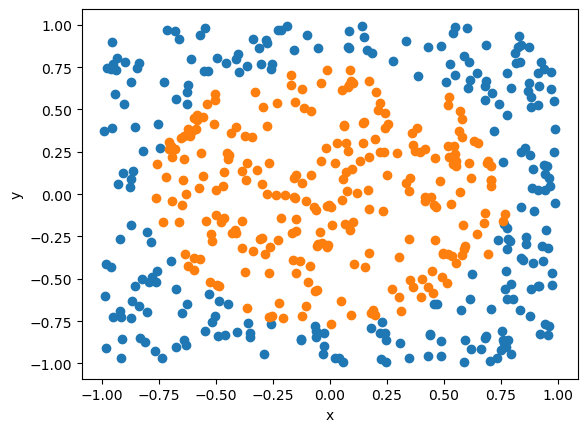

In [18]:
# Load the data
xy = np.load('data03/data2d.npy')
labels = np.load('data03/labels.npy')
xy.shape
# TODO: Plot the data
fig, ax = plt.subplots()
ax.scatter(xy[labels==0][:,0],xy[labels==0][:,1], label="class 0")
ax.scatter(xy[labels==1][:,0],xy[labels==1][:,1], label ="class 1")
ax.set_xlabel("x")
ax.set_ylabel("y")

accuracy is  55.800000000000004 %
(100, 100, 2)
(500, 2)


Text(0, 0.5, 'y')

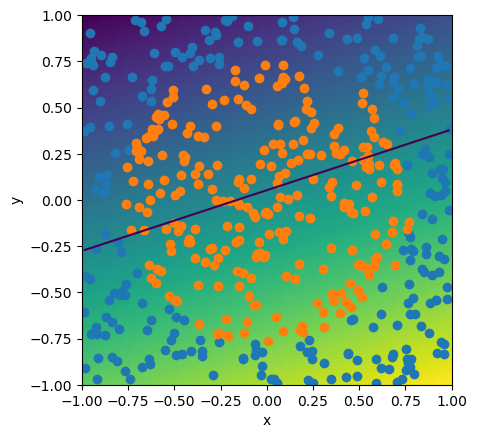

In [70]:

# TODO: fit logistic regression]
regressor = LogisticRegression()
regressor.fit(xy, labels)
# TODO: compute the accuracy
pred_labels = regressor.predict(xy)
acc = (pred_labels == labels).mean()
print("accuracy is ", acc*100, "%")

# TODO: visualize the decision boundary
grid = np.stack(np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)), axis=-1)
print(grid.shape)

pred = regressor.decision_function(grid.reshape(-1,2)).reshape(grid.shape[:-1]).T


fig, ax = plt.subplots()
plt.imshow(pred, origin='lower', extent=(-1, 1, -1, 1))
plt.contour(pred, levels = [0],origin='lower', extent=(-1, 1, -1, 1))

ax.scatter(xy[labels==0][:,0],xy[labels==0][:,1], label="class 0")
ax.scatter(xy[labels==1][:,0],xy[labels==1][:,1], label ="class 1")
ax.set_xlabel("x")
ax.set_ylabel("y")



(b)

(500, 3)


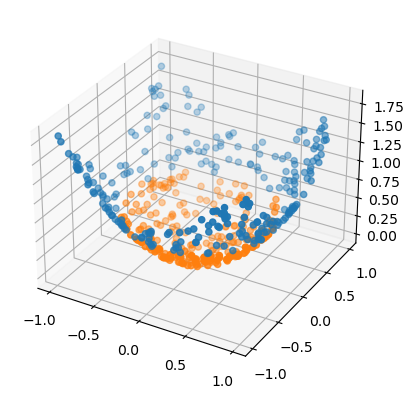

In [94]:
# TODO: Come up with a nonlinear tranformation for the third feature. Compute it and concatenate to the data.
xyz = np.concatenate((xy, xy[:, :1]**2 + xy[:,1:]**2), axis = -1)

# TODO: Show the enhanced data, e.g. with a 3D scatter plot 
#       (https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(xyz[labels==0, :][:,0], xyz[labels==0,:][:,1], xyz[labels==0,:][:,2])
ax.scatter(xyz[labels==1, :][:,0], xyz[labels==1,:][:,1], xyz[labels==1,:][:,2])

In [97]:
# TODO: again, fit and evaluate logistic regression
regressor3 = LogisticRegression()
regressor3.fit(xyz, labels)

pred_labels3 = regressor3.predict(xyz)
acc3 = (pred_labels3 == labels).mean()
print("accuracy is ", acc3*100, "%")

# TODO: visualize the decision boundary
grid = np.stack(np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)), axis=-1)
print(grid.shape)

pred3 = regressor3.decision_function(grid.reshape(-1,2)).reshape(grid.shape[:-1]).T


fig, ax = plt.subplots()
plt.imshow(pred3, origin='lower', extent=(-1, 1, -1, 1))
plt.contour(pred3, levels = [0],origin='lower', extent=(-1, 1, -1, 1))

ax.scatter(xy[labels==0][:,0],xy[labels==0][:,1], label="class 0")
ax.scatter(xy[labels==1][:,0],xy[labels==1][:,1], label ="class 1")
ax.set_xlabel("x")
ax.set_ylabel("y")


accuracy is  99.0 %
(100, 100, 2)


ValueError: X has 2 features, but LogisticRegression is expecting 3 features as input.

## 3) Linear regions of MLPs

(a)

In [75]:
# TODO: define NN architecture
class shallow_MLP(nn.Module):
    def __init__(self, hidden_features):
      super(shallow_MLP, self).__init__()
      self.lin1 = nn.Linear(2,hidden_features)
      self.lin2 = nn.Linear(hidden_features,1)
      self.relu = nn.ReLU()

    def forward(self, x):
       x = self.lin1(x)
       x = self.relu(x)
       x = self.lin2(x)
       return x
    
class deeper_MLP(nn.Module):
  def __init__(self, features):
    super().__init__()
    layers =[]
    n_layers = len(features)
    for i in range(n_layers-1):
        lin = nn.Linear(features[i], features[i+1])
        layers.append(lin)
        if i != n_layers-2:
          layers.append(nn.ReLU())
    self.layers = nn.ModuleList(layers)

  def forward(self, x):
    for layer in self.layers:
       x = layer(x)
    return x


In [74]:
my_dNet =deeper_MLP([2,5,5,5,5,1])

tensor([[-100.0000, -100.0000],
        [-100.0000,  -99.5992],
        [-100.0000,  -99.1984],
        ...,
        [ 100.0000,   99.1984],
        [ 100.0000,   99.5992],
        [ 100.0000,  100.0000]])


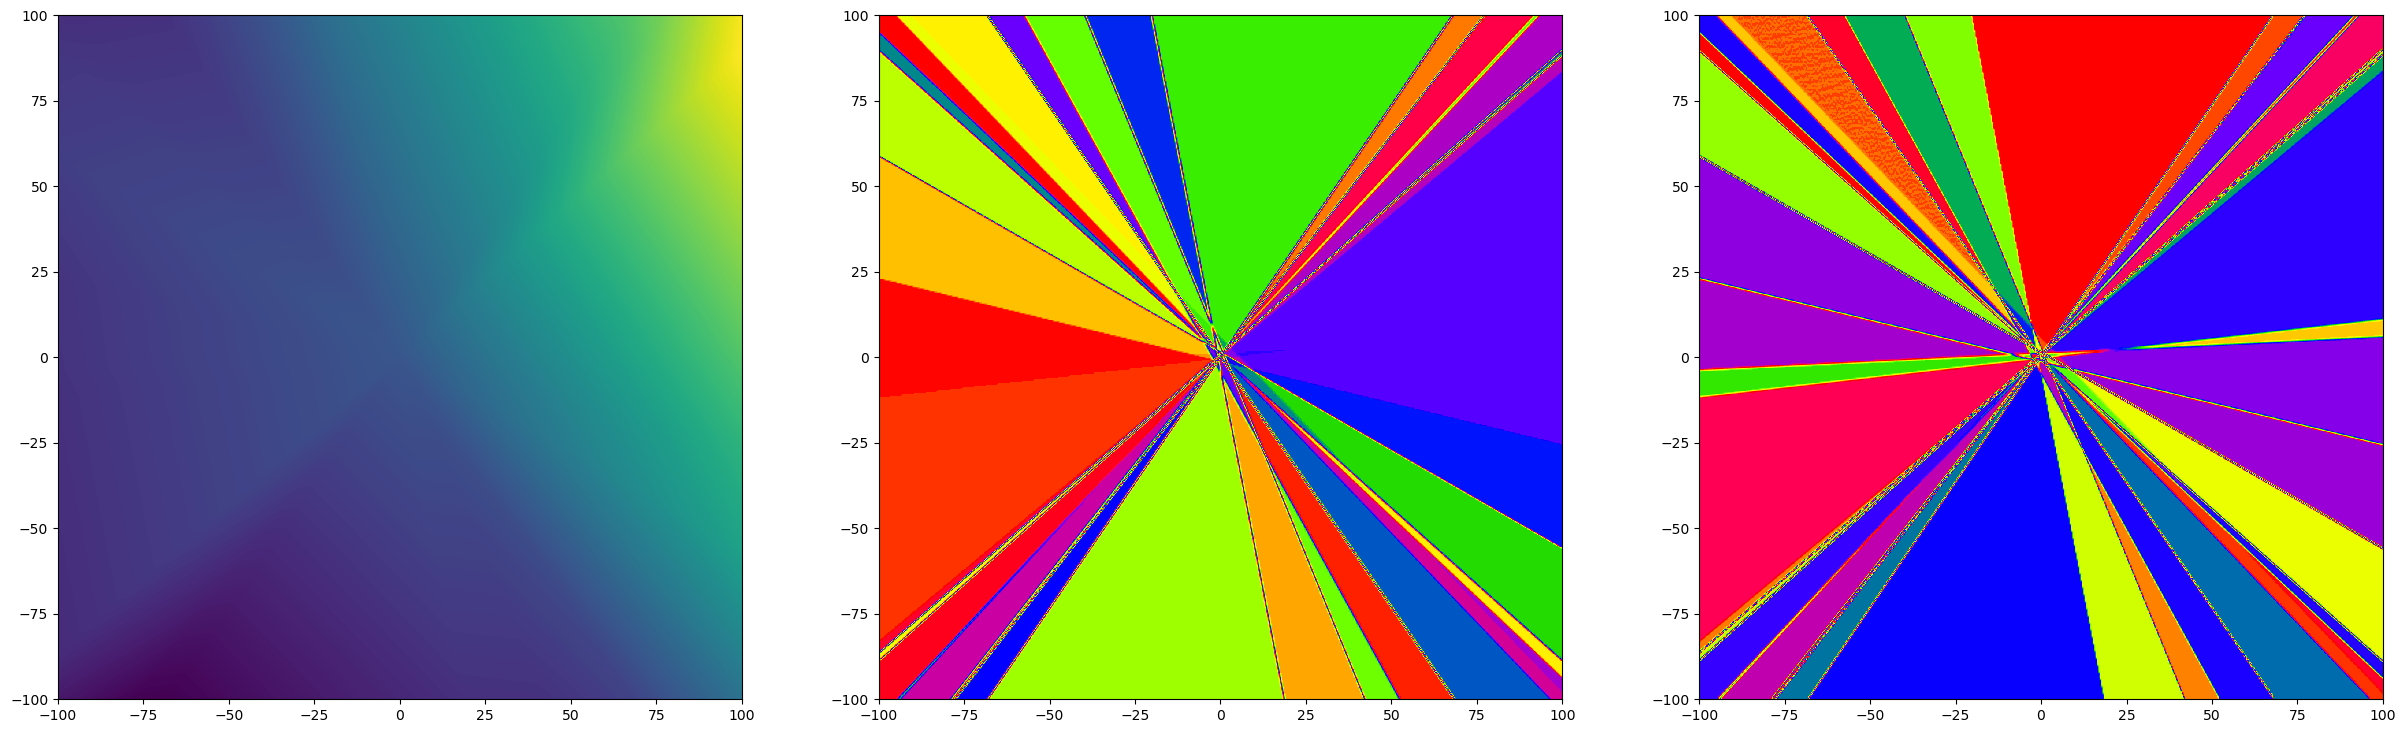

In [45]:
# TODO: instantiate the model and make the visualizations as requested in the task
my_sNet = shallow_MLP(20)


def visualize(model, res, bound):
    with torch.no_grad():
        x = torch.linspace(-bound,bound,res)
        y = torch.linspace(-bound, bound,res)
        xy = torch.meshgrid(x,y, indexing = "ij")
        xy = torch.stack(xy, axis=-1)
        xy = xy.reshape(-1, 2)
        print(xy)
        out = model(xy).reshape(res,res)
        out
        return out


res = 500
bound = 100
result = visualize(shallow_MLP(20), res, bound)
fig, axes = plt.subplots(1,3, figsize=[30,10])
grad = np.gradient(result)



extent = (-bound, bound, -bound, bound)
axes[0].imshow(result.T ,extent=extent, origin='lower')
axes[1].imshow(grad[0].T/ (2*bound/res), extent = extent, origin = "lower", cmap="prism")
axes[2].imshow(grad[1].T/ (2*bound/res), extent = extent, origin = "lower", cmap="prism")


tensor([[-100.0000, -100.0000],
        [-100.0000,  -99.5992],
        [-100.0000,  -99.1984],
        ...,
        [ 100.0000,   99.1984],
        [ 100.0000,   99.5992],
        [ 100.0000,  100.0000]])


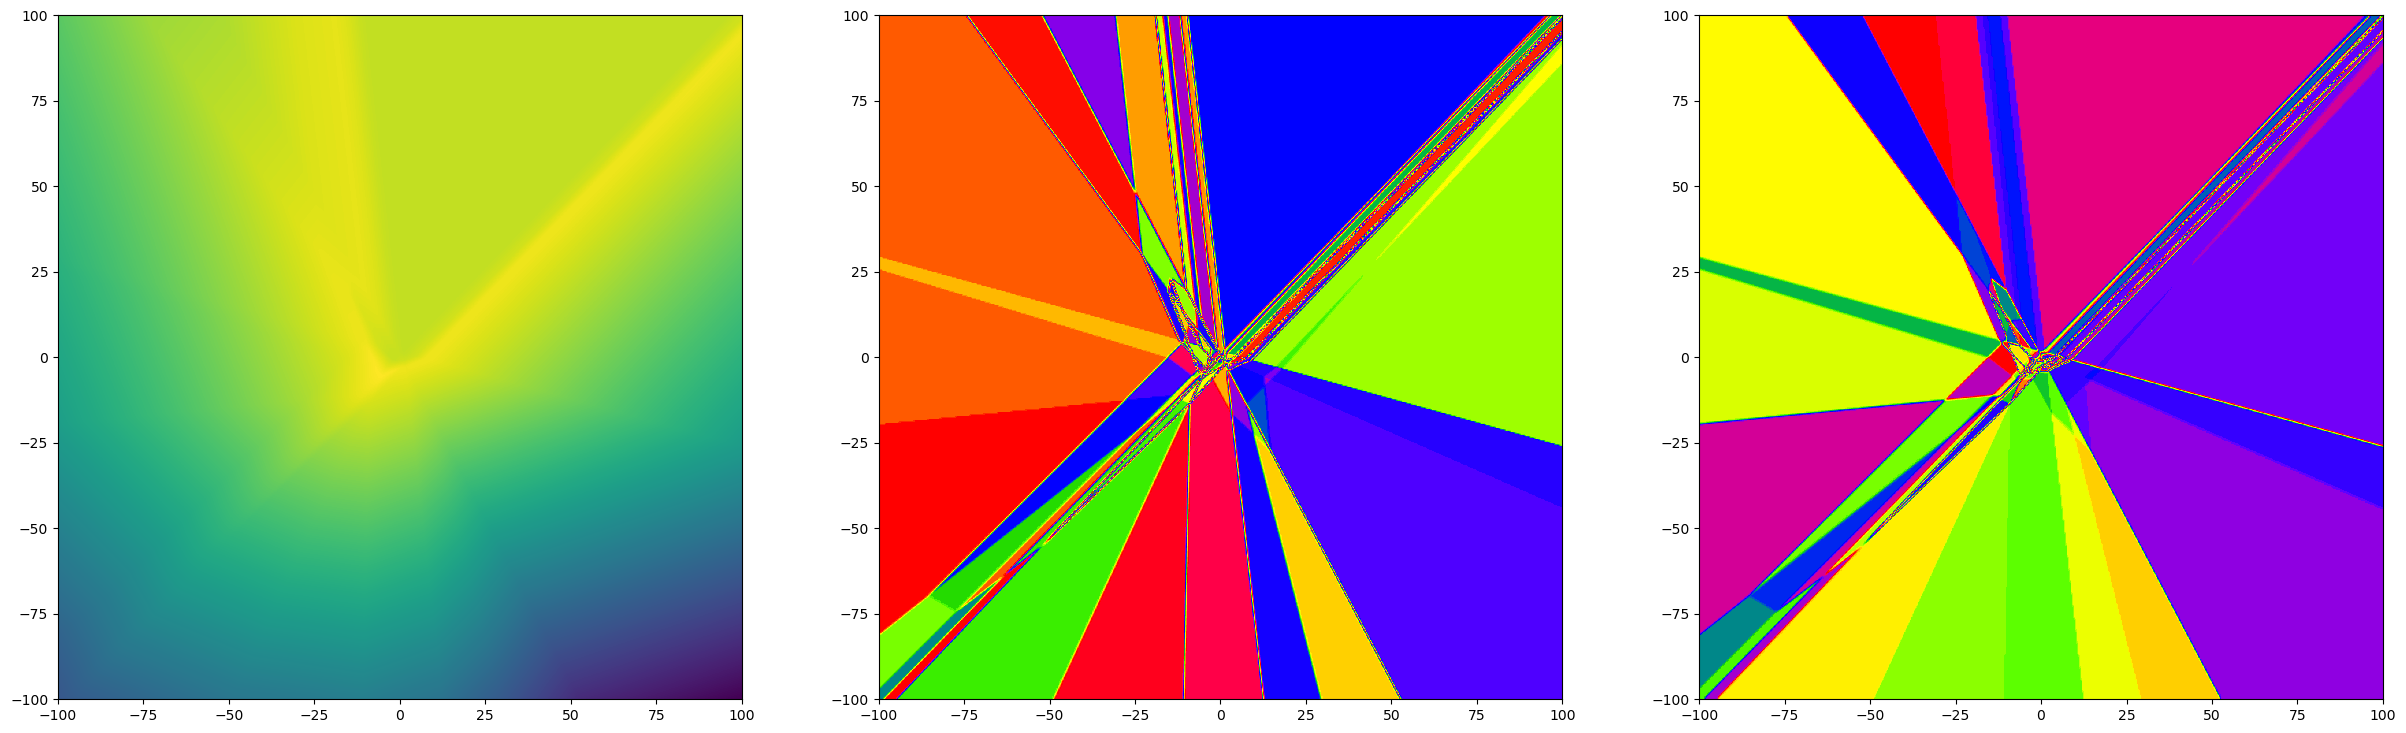

In [77]:
#deeper model
res = 500
bound = 100
result = visualize(deeper_MLP([2,5,5,5,5,1]), res, bound)
fig, axes = plt.subplots(1,3, figsize=[30,10])
grad = np.gradient(result)



extent = (-bound, bound, -bound, bound)
axes[0].imshow(result.T ,extent=extent, origin='lower')
axes[1].imshow(grad[0].T/ (2*bound/res), extent = extent, origin = "lower", cmap="prism")
axes[2].imshow(grad[1].T/ (2*bound/res), extent = extent, origin = "lower", cmap="prism")

(b)

In [ ]:
# TODO: instantiate the model and make the visualizations as requested in the task

(c)

In [ ]:
# TODO: instantiate the model and make the visualizations as requested in the task

(d)

In [80]:
# TODO: define NN architecture
(np.sin(3)+3-np.exp(2))*(3-np.exp(2))

18.644429807504036

In [ ]:
# TODO: instantiate the model and make the visualizations as requested in the task